# P4 - SQL

This project give you experience with SQL topics. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
import getpass


import otter
grader = otter.Notebook()

import re
import os
if re.search(r'amzn', os.uname().release):
    GS = True
else:
    GS = False

# SQL 

For this portion of the project you will look at querying a database: `imdbmini.db`.  This database is similar to what was used in the lab on this topic, but it has some noticeable differences. 

This is a "minified" version of the [Internet Movie Database](https://www.imdb.com/interfaces/) (IMDb). This SQLite database (~10MB) is a tiny sample of the much larger database (more than a few GBs). As a result, disclaimer that we may get wildly different results than if we use the whole database!

The database is available to download on Canvas. 

Below, you will connect to this database. 



In [2]:
conn = sqlite3.connect("imdbmini.db")

We will again make use of the functions `print_sql` or `pretty_print_sql` to look at the results of the SQL queries. 

In [3]:
def print_sql(c, s):
    print('>', s)
    for result in c.execute(s):
        print(result)
    print()

In [4]:
def pretty_print_sql(c, s):
    print('>', s)
    df = pd.read_sql(s, c)
    display(df)
    return df

We can look at the tables in the database. 

In [5]:
dbinfo = print_sql(conn, "SELECT sql FROM sqlite_master WHERE type='table';")

> SELECT sql FROM sqlite_master WHERE type='table';
('CREATE TABLE "Title" (\n"tconst" INTEGER,\n  "titleType" TEXT,\n  "primaryTitle" TEXT,\n  "originalTitle" TEXT,\n  "isAdult" TEXT,\n  "startYear" TEXT,\n  "endYear" TEXT,\n  "runtimeMinutes" TEXT,\n  "genres" TEXT\n)',)
('CREATE TABLE "Name" (\n"nconst" INTEGER,\n  "primaryName" TEXT,\n  "birthYear" TEXT,\n  "deathYear" TEXT,\n  "primaryProfession" TEXT\n)',)
('CREATE TABLE "Role" (\ntconst INTEGER,\nordering TEXT,\nnconst INTEGER,\ncategory TEXT,\njob TEXT,\ncharacters TEXT\n)',)
('CREATE TABLE "Rating" (\ntconst INTEGER,\naverageRating TEXT,\nnumVotes TEXT\n)',)



From running the above cell, we see the database has 4 tables: `Name`, `Role`, `Rating`, and `Title`.

See descriptions of each table's schema.</summary>
    
**`Name`** – Contains the following information for names of people.
    
- nconst (text) - alphanumeric unique identifier of the name/person
- primaryName (text)– name by which the person is most often credited
- birthYear (integer) – in YYYY format
- deathYear (integer) – in YYYY format
    
    
**`Role`** – Contains the principal cast/crew for titles.
    
- tconst (text) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given tconst
- nconst (text) - alphanumeric unique identifier of the name/person
- category (text) - the category of job that person was in
- characters (text) - the name of the character played if applicable, else '\\N'
    
**`Rating`** – Contains the IMDb rating and votes information for titles.
    
- tconst (integer) - alphanumeric unique identifier of the title
- averageRating (text) – weighted average of all the individual user ratings
- numVotes (text) - number of votes (i.e., ratings) the title has received
    
**`Title`** - Contains the following information for titles.
    
- tconst (text) - alphanumeric unique identifier of the title
- titleType (text) -  the type/format of the title
- primaryTitle (text) -  the more popular title / the title used by the producers on promotional materials at the point of release
- isAdult (text) - 0: non-adult title; 1: adult title
- startYear (text) – represents the release year of a title.
- runtimeMinutes (integer)  – primary runtime of the title, in minutes
    
From the above descriptions, we can conclude the following:
* `Name.nconst` and `Title.tconst` are primary keys of the `Name` and `Title` tables, respectively.
* `Role.nconst` and `Role.tconst` are **foreign keys** that point to `Name.nconst` and `Title.tconst`, respectively.

## Question 1

What are the different kinds of `titleType`s included in the `Title` table? Write a query to find out all the unique `titleType`s of films using the `DISTINCT` keyword.  (**You may not use `GROUP BY`.**)

In [6]:
q1query = """
SELECT DISTINCT titleType FROM Title;
"""
q1df = pretty_print_sql(conn, q1query)


> 
SELECT DISTINCT titleType FROM Title;



,titleType
0,short
1,movie
2,tvSeries
3,tvMovie
4,tvMiniSeries
5,video
6,videoGame
7,tvEpisode
8,tvSpecial


In [7]:
grader.check("q1")

q1 results: All test cases passed!

## Question 2

Before we proceed we want to get a better picture of the kinds of jobs that exist.  To do this examine the `Role` table by computing the number of records with each job `category`.  Present the results in descending order by the total counts.

The top of your table should look like this (however, you should have more rows):

| |category|total|
|-----|-----|-----|
|**0**|actor|21665|
|**1**|writer|13830|
|**2**|...|...|

In [8]:
q2query = """
SELECT category, COUNT(*) AS total FROM Role
GROUP BY category ORDER BY total DESC;
"""
q2df = pretty_print_sql(conn, q2query)


> 
SELECT category, COUNT(*) AS total FROM Role
GROUP BY category ORDER BY total DESC;



,category,total
0,actor,21665
1,writer,13830
2,actress,12175
3,producer,11028
4,director,6995
5,composer,4123
6,cinematographer,2747
7,editor,1558
8,self,623
9,production_designer,410


In [9]:
grader.check("q2")

q2 results: All test cases passed!

## Question 3 

How far back does our data go? Does it only include recent data, or do we have information about older movies and movie stars as well? 

List the **10 oldest movie titles** by `startYear` and then `primaryTitle` both in **ascending** order.  Do not include movies where the `startYear` is `NULL`.  The output should contain the `startYear`, `primaryTitle`, and `titleType`.

In [10]:
q3query = """
SELECT startYear, primaryTitle, titleType FROM Title 
WHERE startYear IS NOT NULL AND titleType = 'movie'
ORDER BY startYear ASC, primaryTitle ASC LIMIT 10;
"""
q3df = pretty_print_sql(conn, q3query)


> 
SELECT startYear, primaryTitle, titleType FROM Title 
WHERE startYear IS NOT NULL AND titleType = 'movie'
ORDER BY startYear ASC, primaryTitle ASC LIMIT 10;



,startYear,primaryTitle,titleType
0,1915,The Birth of a Nation,movie
1,1920,The Cabinet of Dr. Caligari,movie
2,1921,The Kid,movie
3,1922,Nosferatu,movie
4,1924,Sherlock Jr.,movie
5,1925,Battleship Potemkin,movie
6,1925,The Gold Rush,movie
7,1926,The General,movie
8,1927,Metropolis,movie
9,1927,Sunrise,movie


In [11]:
grader.check("q3")

q3 results: All test cases passed!

## Question 4

Let's calculate the distribution of movies by year. Write a query that returns the **total** number of movie titles for each `startYear` in the `Title` table as `total`.  Keep in mind that some entries may not have a `startYear` listed -- you should filter those out.  Order your final results by the `startYear` in **ascending** order.

The first few records of the table should look like the following (but you should compute the entire table).


| |startYear|total|
|-----|------|-----|
|**0**|1915|1|
|**1**|1920|1|
|**2**|1921|1|
|**3**|1922|1|
|...|...|...|


In [12]:
q4query = """
SELECT startYear, COUNT(*) AS total FROM Title
WHERE startYear IS NOT NULL AND titleType = 'movie'
GROUP BY startYear
ORDER BY startYear ASC;
"""
q4df = pretty_print_sql(conn, q4query)


> 
SELECT startYear, COUNT(*) AS total FROM Title
WHERE startYear IS NOT NULL AND titleType = 'movie'
GROUP BY startYear
ORDER BY startYear ASC;



,startYear,total
0,1915,1
1,1920,1
2,1921,1
3,1922,1
4,1924,1
...,...,...
97,2017,213
98,2018,230
99,2019,194
100,2020,117


In [13]:
grader.check("q4")

q4 results: All test cases passed!

## Question 5

Who are the **top 10 most prolific movie actors**?

Define the term **"movie actor"** is defined as anyone with an `"actor"` or `"actress"` job category role in a `"movie"` title type.

Your SQL query should output exactly two fields named `name` (the movie actor name) and `total` (the number of movies the movie actor appears in). Order the records by `total` in descending order, and break ties by ordering by `name` in ascending order.

Your result should look something like the following, but without `????`:

| | name | total |
|-----|-----|-----|
|**0**| ???? | 64 |
|**1**| ???? | 54 |
|**2**| ???? | 53 |
|**3**| ???? | 49 |
|**4**| ???? | 46 |
|**5**| ???? | 43 |
|**6**| ???? | 41 |
|**7**| ???? | 40 |
|**8**| ???? | 40 |
|**9**| ???? | 39 |

**Hints**:

* ***The query should take < 1 minute to run.***
* Google the top of the list and see if it makes sense. (Since this is a mini version of IMDb, some may still be off.)
* If you want to include a non-aggregate field in the `SELECT` clause, it must also be included in the `GROUP BY` clause.

In [14]:
q5query = """
SELECT Name.primaryName AS name, COUNT(*) AS total FROM Role
JOIN Title ON Role.tconst = Title.tconst
JOIN Name ON Role.nconst = Name.nconst
WHERE Title.titleType = 'movie' AND (Role.category = 'actor' OR Role.category = 'actress')
GROUP BY Name.primaryName
ORDER BY total DESC, name ASC
LIMIT 10;
"""
q5df = pretty_print_sql(conn, q5query)


> 
SELECT Name.primaryName AS name, COUNT(*) AS total FROM Role
JOIN Title ON Role.tconst = Title.tconst
JOIN Name ON Role.nconst = Name.nconst
WHERE Title.titleType = 'movie' AND (Role.category = 'actor' OR Role.category = 'actress')
GROUP BY Name.primaryName
ORDER BY total DESC, name ASC
LIMIT 10;



,name,total
0,Robert De Niro,64
1,Samuel L. Jackson,54
2,Nicolas Cage,53
3,Bruce Willis,49
4,Tom Hanks,46
5,Johnny Depp,43
6,Mark Wahlberg,41
7,Liam Neeson,40
8,Morgan Freeman,40
9,Adam Sandler,39


In [15]:
grader.check("q5")

q5 results: All test cases passed!

## Question 6

**The `CASE` Keyword**

The `Rating` table has the `numVotes` and the `averageRating` for each title. A movie is consider a **"big hit**" if there were more than 100,000 votes for the movie. Which `movie` titles were **"big hits"**? Construct a query that generates the following result:

| | isBigHit | total |
|-----|-----|-----|
|**0**| no | ???? |
|**1**| yes | ???? |

Where `????` is replaced with the correct values. The row with `no` should have the count for how many movies **are not** big hits, and the row with `yes` should have the count of how many movies **are** big hits.

**Hints**:

* While SQL sometimes cast data automatically, it is still best practice to cast string data to numerical data type manually before performing arithmetic operation for the purposes of readability and reproducibility.
* You will need to use some type of `JOIN`.
* You may also consider using a `CASE` statement:
    ```
    CASE 
        WHEN ... THEN ...
        ELSE ... 
    END
    ```
 `CASE` statements are the SQL-equivalent of Python `if... elif... else` statements. To read up on `CASE`, take a look at the following links:
    - https://www.sqlitetutorial.net/sqlite-case/
    - https://mode.com/sql-tutorial/sql-case/
    - https://www.w3schools.com/sql/sql_ref_case.asp


In [16]:
q6query = """
SELECT 
    CASE 
        WHEN CAST(Rating.numVotes AS INTEGER) > 100000 THEN 'yes' 
        ELSE 'no'
    END AS isBigHit, COUNT(*) AS total FROM Rating
JOIN Title ON Rating.tconst = Title.tconst WHERE Title.titleType = 'movie'
GROUP BY isBigHit;
"""
q6df = pretty_print_sql(conn, q6query)


> 
SELECT 
    CASE 
        WHEN CAST(Rating.numVotes AS INTEGER) > 100000 THEN 'yes' 
        ELSE 'no'
    END AS isBigHit, COUNT(*) AS total FROM Rating
JOIN Title ON Rating.tconst = Title.tconst WHERE Title.titleType = 'movie'
GROUP BY isBigHit;



,isBigHit,total
0,no,4318
1,yes,2041


In [17]:
grader.check("q6")

q6 results: All test cases passed!

## Question 7

**How does movie length relate to ratings?**  To answer this question we want to bin `movie` titles by length, compute the average of the average ratings within each length bin, and visualize the relations.



### Question 7a

We will group movies by 10-minute increments -- that is, one bin for movies \[0, 10) minutes long, another for \[10, 20) minutes, another for \[20, 30) minutes, and so on. Use the following code snippet to help construct 10-minute bins: 

```
ROUND(runtimeMinutes / 10.0 + 0.5) * 10 AS runtimeBin
```

Construct a query that generates a resulting table containing the **`runtimeBin`**, the **average** of the **average ratings** (as `averageRating`), the **average number of votes** (as `averageNumVotes`), and the number of `titles` in that **runtimeBin** (as `total`).  Only include **movies** with **at least 10000 votes**.  Order the final results by the value of `runtimeBin`.

**Hint**:
* You can use a variable(s) defined in your `SELECT` clause in the later part of your query.

In [18]:
q7query = """
SELECT 
    ROUND(runtimeMinutes / 10.0 + 0.5) * 10 AS runtimeBin,
    AVG(CAST(Rating.averageRating AS FLOAT)) AS averageRating,
    AVG(CAST(Rating.numVotes AS INTEGER)) AS averageNumVotes,
    COUNT(*) AS total FROM Title
JOIN Rating ON Title.tconst = Rating.tconst WHERE Title.titleType = 'movie' AND Rating.numVotes >= 10000 AND runtimeMinutes IS NOT NULL
GROUP BY runtimeBin
ORDER BY runtimeBin ASC;
"""
q7df = pretty_print_sql(conn, q7query)


> 
SELECT 
    ROUND(runtimeMinutes / 10.0 + 0.5) * 10 AS runtimeBin,
    AVG(CAST(Rating.averageRating AS FLOAT)) AS averageRating,
    AVG(CAST(Rating.numVotes AS INTEGER)) AS averageNumVotes,
    COUNT(*) AS total FROM Title
JOIN Rating ON Title.tconst = Rating.tconst WHERE Title.titleType = 'movie' AND Rating.numVotes >= 10000 AND runtimeMinutes IS NOT NULL
GROUP BY runtimeBin
ORDER BY runtimeBin ASC;



,runtimeBin,averageRating,averageNumVotes,total
0,50.0,7.850000,42535.000000,2
1,60.0,6.400000,30668.500000,2
2,70.0,7.600000,59822.000000,13
3,80.0,6.860938,67896.187500,64
4,90.0,6.283951,76907.608466,567
5,100.0,6.418263,82147.242591,1451
6,110.0,6.573970,99912.440934,1456
7,120.0,6.783168,121878.855086,1111
8,130.0,7.039082,152911.968011,719
9,140.0,7.184529,181664.825112,446


In [19]:
grader.check("q7a")

q7a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 7b

Create two line plots below. The first should show the relationship between the number of votes (*y-axis*) vs runtime (*x-axis*); and the second will show the relationship between average rating (*y-axis*) and runtime (*x-axis*). Use the columns from the table generated in the previous part, `q7df`. If your SQL query is correct you should get some interesting plots below. This might explain why directors keep going with a particular range of runtimes. 
 

Text(0, 0.5, 'Average Rating')

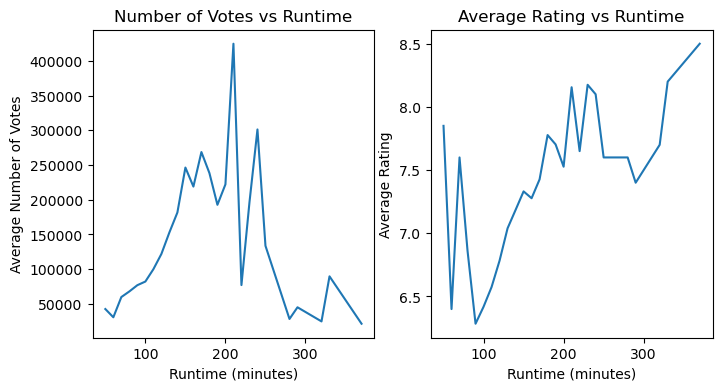

In [20]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1) # DO NOT MODIFY THIS LINE
plt.plot(q7df['runtimeBin'], q7df['averageNumVotes'])
plt.title("Number of Votes vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Number of Votes")

plt.subplot(1, 2, 2) # DO NOT MODIFY THIS LINE
plt.plot(q7df['runtimeBin'], q7df['averageRating'])
plt.title("Average Rating vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")

<!-- END QUESTION -->

## Question 8

Which **movie actors** have the highest average ratings across all the movies in which they star? Again, define **"movie actor"** as anyone with an `actor` or `actress` job category role in a `movie` title type.

Construct a query that generates a resulting table consisting of the **movie actor's name**  (as `name`) and their **average actor rating** (as `actorRating`) computed by rescaling ratings for movies in which they had a role:

$$
\text{actorRating} = 
\frac{\sum_m \text{averageRating}[m] * \text{numVotes}[m]}{\sum_m \text{numVotes}[m]}
$$

In addition, only consider ratings where there are **at least 1000** votes and only consider movie actors that have **at least 20 rated performances**. Present the movie actors with the **top 10** `actorRating` in descending order and break ties alphabetically using the movie actor's name.

The results should look something like this but without the `????`, and with higher rating precision.

| | name | actorRating |
|-----|-----|-----|
|**0**|????|8.4413...|
|**1**|????|8.2473...|
|**2**|????|8.1383...|
|**3**|????|8.1339...|
|**4**|????|8.0349...|
|**5**|????|7.9898...|
|**6**|????|7.9464...|
|**7**|????|7.9330...|
|**8**|????|7.9261...|
|**9**|????|7.8668...|


**Note**:
* ***The query should take < 3 minutes to run.***
* If an actor/actress has multiple `role` listings for a movie, then that movie will have a bigger impact in the overall average (this is desired).

In [21]:
q8query = """
SELECT Name.primaryName AS name, SUM(Rating.averageRating * Rating.numVotes) * 1.0 / SUM(Rating.numVotes) AS actorRating FROM Role
JOIN Title ON Role.tconst = Title.tconst
JOIN Rating ON Title.tconst = Rating.tconst
JOIN Name ON Role.nconst = Name.nconst
WHERE Title.titleType = 'movie' AND (Role.category = 'actor' OR Role.category = 'actress') AND Rating.numVotes >= 1000
GROUP BY Name.primaryName HAVING COUNT(*) >= 20 ORDER BY actorRating DESC, name ASC LIMIT 10;
"""
q8df = pretty_print_sql(conn, q8query)


> 
SELECT Name.primaryName AS name, SUM(Rating.averageRating * Rating.numVotes) * 1.0 / SUM(Rating.numVotes) AS actorRating FROM Role
JOIN Title ON Role.tconst = Title.tconst
JOIN Rating ON Title.tconst = Rating.tconst
JOIN Name ON Role.nconst = Name.nconst
WHERE Title.titleType = 'movie' AND (Role.category = 'actor' OR Role.category = 'actress') AND Rating.numVotes >= 1000
GROUP BY Name.primaryName HAVING COUNT(*) >= 20 ORDER BY actorRating DESC, name ASC LIMIT 10;



,name,actorRating
0,Diane Keaton,8.441302
1,Tim Robbins,8.247318
2,Al Pacino,8.138361
3,Michael Caine,8.133915
4,Leonardo DiCaprio,8.034961
5,Christian Bale,7.989825
6,Robert Duvall,7.946483
7,Jack Nicholson,7.933034
8,Kevin Spacey,7.926158
9,Clint Eastwood,7.866839


In [22]:
grader.check("q8")

q8 results: All test cases passed!

## Congratulations! You have finished P4! 

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the P4 assignment on Gradescope. 


For this assignment, the results and variables you create in your notebook will be saved out to a log file `.OTTER_LOG`.  This file will be included in your zip, when you run the export function below. 



Make sure you have run all cells in your notebook **in order** before running the cell below, so that all information gets saved to the log file correctly. The cell below will generate a zip file for you to submit. **Please save before exporting!**

If you run the notebook repeatedly, more and more information gets added to the `.OTTER_LOG` file. 

<div class="alert alert-warning">
<strong>Warning! - Clean log file</strong>     
    Before running your last single run through the notebook, clear all clear, restart the kernel, delete the `.OTTER_LOG` so that a fresh one is created. 
</div>

Your `.OTTER_LOG` file and `p4.otter` should be part of the zip submission (the export function does this automatically).  

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)